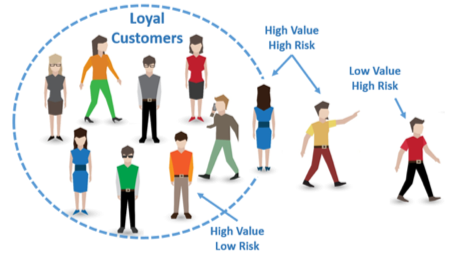

1.  **Introduction to Customer Churn**
2.  **Importing Libraries and Data**
3.  **Exploratory Data Analysis**
4.  **Data Visualization**
5.  **Data Preprocessing**
6.  **Creating Machine Learning Models**
7.  **Comparing Models' Performances**
8. **Conclusion**

## 1. **INTRODUCTION TO CUSTOMER CHURN**

**Customer attrition or customer churn occurs when customers or subscribers stop doing business with a company or service. Customer churn is a critical metric because it is much more cost effective to retain existing customers than it is to acquire new customers as it saves cost of sales and marketing. Customer retention is more cost-effective as you’ve already earned the trust and loyalty of existing customers.**

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

**There are various ways to calculate this metric as churn rate may represent the total number of customers lost, the percentage of customers lost compared to the company’s total customer count, the value of recurring business lost, or the percent of recurring value lost. However, in this dataset, it is defined as a binary variable for each customer and calculating the rate is not the objective. Thus the objective here is to identify and quantify the factors which influence churn rate.**

**This is a fairly easy and beginner level project with fewer variables. It is not a useful application for neural networks as number of training examples are comparatively less but it is easy to understand neural networks using this.**

## 2. **IMPORTING LIBRARIES AND DATA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3. **EXPLORATORY DATA ANALYSIS**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### **Churn feature is the target feature for our models**

In [4]:
cat = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
       'PaymentMethod','Churn']

In [5]:
le = LabelEncoder()
for i in cat:
    df[i] = le.fit_transform(df[i])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [6]:
df.drop('customerID',axis = 1, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [7]:
df.shape

(7043, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


#### **TotalCharges feature seems in object type. It should be converted to numeric**

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [10]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **There is no missing value in dataset**

In [12]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2283.30
std,24.56,30.09,2265.00
min,0.00,18.25,18.80
25%,9.00,35.50,402.23
50%,29.00,70.35,1400.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


## 4. **DATA VISUALIZATIONS**

In [13]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)


fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

#### **In these plots it seems, 49.5% of customers are female and 50.5% of customers are male**
#### **Also in churn feature plot, it seems 26.5% of customers changed their company ( churned )**

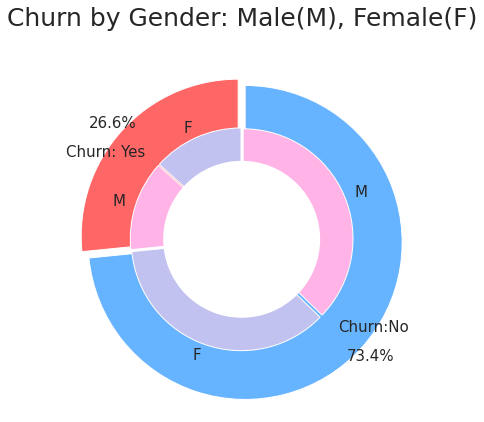

In [14]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn by Gender: Male(M), Female(F)', fontsize=25, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [15]:

fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=900, height=700, bargap=0.2)
fig.show()

In [16]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [17]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [18]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [19]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [20]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [21]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [22]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [23]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [24]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [25]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=900, height=700, bargap=0.1)
fig.show()

In [26]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

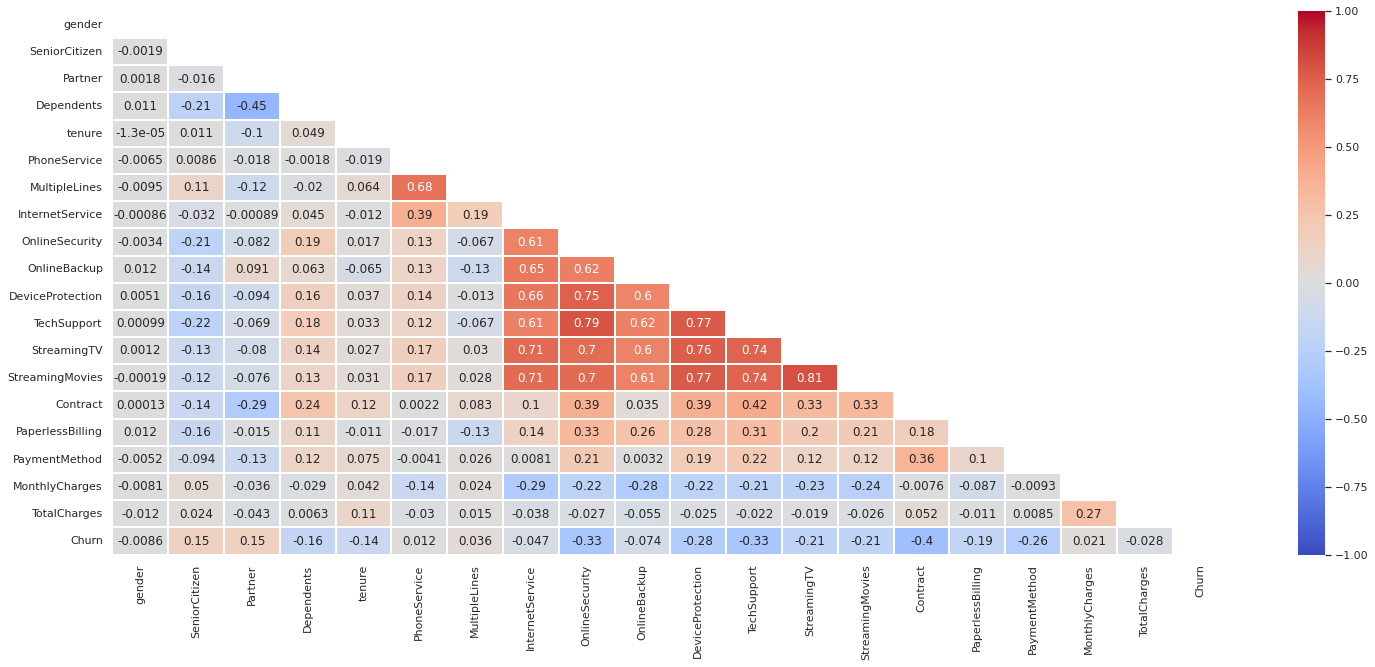

In [27]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## 5. **DATA PREPROCESSING**

In [28]:
ss = StandardScaler()

In [29]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [30]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
df[num_cols] = ss.fit_transform(df[num_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.28,0,1,0,0,2,0,0,0,0,0,1,2,-1.16,-0.99,0
1,1,0,0,0,0.07,1,0,0,2,0,2,0,0,0,1,0,3,-0.26,-0.17,0
2,1,0,0,0,-1.24,1,0,0,2,2,0,0,0,0,0,1,3,-0.36,-0.96,1
3,1,0,0,0,0.51,0,1,0,2,0,2,2,0,0,1,0,0,-0.75,-0.20,0
4,0,0,0,0,-1.24,1,0,1,0,0,0,0,0,0,0,1,2,0.20,-0.94,1


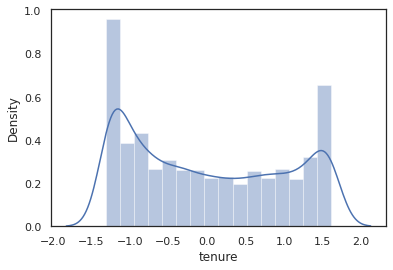

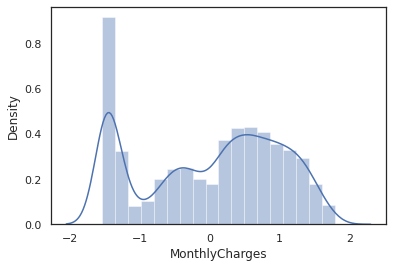

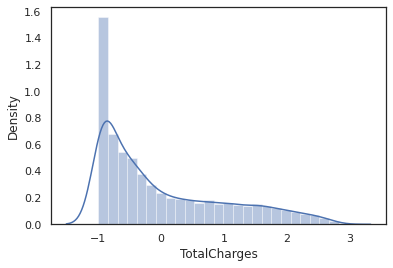

In [31]:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

## 6. **CREATING MACHINE LEARNING MODELS**

In [32]:
X = df.drop('Churn',axis = 1).values
y = df['Churn'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123, stratify = y)

In [34]:
import scikitplot as skplot

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1552
           1       0.56      0.51      0.53       561

    accuracy                           0.76      2113
   macro avg       0.69      0.68      0.69      2113
weighted avg       0.76      0.76      0.76      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

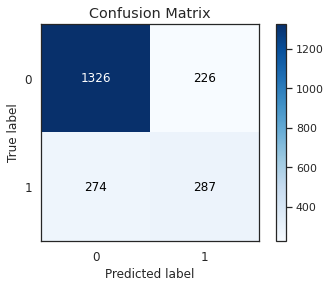

In [35]:
### KNN

knn = KNeighborsClassifier() ## n_neighbors is 5 by default
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_knn)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.52      0.59       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.80      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

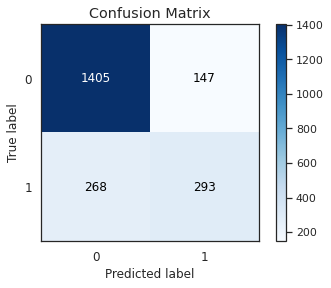

In [36]:
### LOGISTIC REGRESSION

log = LogisticRegression(solver = "liblinear")
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)
print(classification_report(y_test,y_pred_log))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_log)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.70      0.72      2113
weighted avg       0.78      0.79      0.79      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

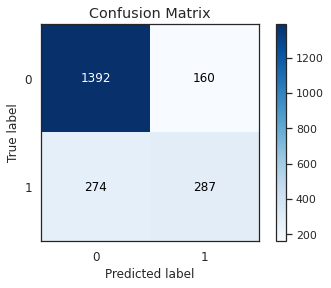

In [37]:
### SVM-LINEAR

svc = SVC(kernel = "linear", probability=True) 
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test,y_pred_svc))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_svc)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.68      0.45      0.54       561

    accuracy                           0.80      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

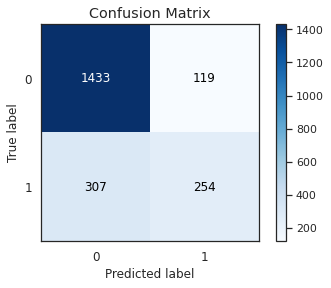

In [38]:
### SVM-RBF

svc_rbf = SVC(kernel = "rbf",probability=True) 
svc_rbf.fit(X_train, y_train)
y_pred_svc_rbf = svc_rbf.predict(X_test)
print(classification_report(y_test,y_pred_svc_rbf))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_svc_rbf)

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1552
           1       0.46      0.46      0.46       561

    accuracy                           0.71      2113
   macro avg       0.63      0.63      0.63      2113
weighted avg       0.71      0.71      0.71      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

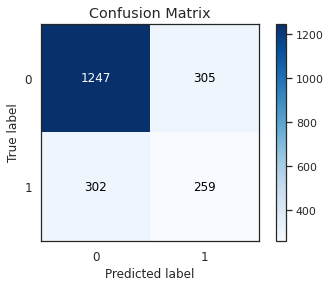

In [39]:
### DECISION TREE CLASSIFIER

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_dt)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1552
           1       0.64      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

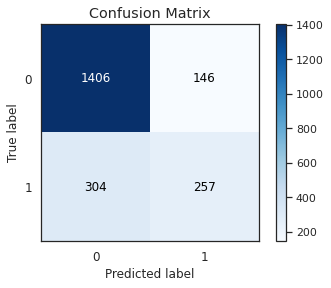

In [40]:
### BAGGING

bag = BaggingClassifier()
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print(classification_report(y_test,y_pred_bag))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_bag)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1552
           1       0.70      0.44      0.54       561

    accuracy                           0.80      2113
   macro avg       0.76      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

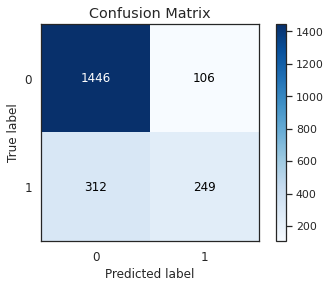

In [41]:
### VOTING

clf1 = LogisticRegression(solver = "liblinear")
clf2 = RandomForestClassifier()
clf3 = SVC(kernel = "rbf",probability=True)
clf4 = KNeighborsClassifier()
vote = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3),('knn',clf4)], voting='hard')
vote.fit(X_train, y_train)
y_pred_vote = vote.predict(X_test)
print(classification_report(y_test,y_pred_vote))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_vote)

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.49      0.57       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

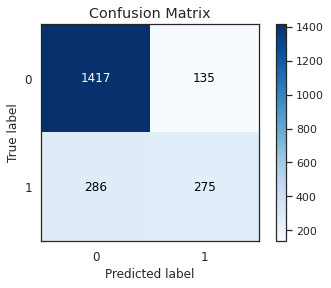

In [42]:
### RANDOM FOREST
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test,y_pred_rf))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_rf)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

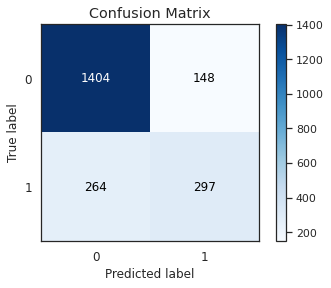

In [43]:
### ADABOOST
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(classification_report(y_test,y_pred_ada))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_ada)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.50      0.58       561

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

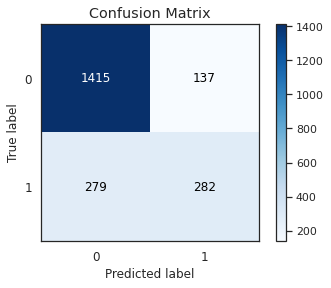

In [44]:
### GBM

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print(classification_report(y_test,y_pred_gbm))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_gbm)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.51      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

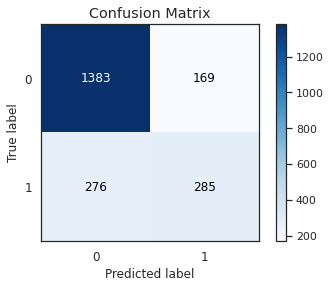

In [45]:
### XGBOOST

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test,y_pred_xgb))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_xgb)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

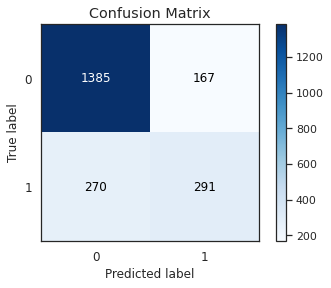

In [46]:
### LGBM

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print(classification_report(y_test,y_pred_lgb))

skplot.metrics.plot_confusion_matrix(y_test,y_pred_lgb)

## 7. **COMPARING MODELS' PERFORMANCES**

In [47]:
models = ["K-Nearest Neighbors","Logistic Regression","Linear SVM","RBF SVM","Decision Tree","Bagging",
         "Voting","Random Forest","AdaBoost","GBM","XGBOOST","LGBM"]

test_accuracies = [
    
    accuracy_score(y_test,y_pred_knn),
    accuracy_score(y_test,y_pred_log),
    accuracy_score(y_test,y_pred_svc),
    accuracy_score(y_test,y_pred_svc_rbf),
    accuracy_score(y_test,y_pred_dt),
    accuracy_score(y_test,y_pred_bag),
    accuracy_score(y_test,y_pred_vote),
    accuracy_score(y_test,y_pred_rf),
    accuracy_score(y_test,y_pred_ada),
    accuracy_score(y_test,y_pred_gbm),
    accuracy_score(y_test,y_pred_xgb),
    accuracy_score(y_test,y_pred_lgb)
    
]


accuracies = pd.DataFrame({
    
    "Model": models,
    "Accuracy Score": test_accuracies
    
})

accuracies.sort_values('Accuracy Score',ascending = False)

,Model,Accuracy Score
8,AdaBoost,0.81
1,Logistic Regression,0.80
9,GBM,0.80
6,Voting,0.80
7,Random Forest,0.80
3,RBF SVM,0.80
2,Linear SVM,0.79
11,LGBM,0.79
10,XGBOOST,0.79
5,Bagging,0.79


## 8. **CONCLUSION**

#### **It seems AdaBoost has the highest Accuracy Score**

#### **Models' accuracies can be improved with cross_validation**

## **IF YOU LIKED THIS NOTEBOOK, PLEASE DO UPVOTE**

## **HAPPY CODING**